
## **Data Science and Business Analytics GRIP MAY21**


### **Task 3: Exploratory Data Analysis - Retail**

Problem: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

### Author: Kritika Misra

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# loading the dataset

import os
os.chdir("C:/Users/Kritika/Downloads/")
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## **Comprehending the data**

In [86]:
df.shape

(9994, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [88]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [89]:
# checking if there are any null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**So, no null values in the dataset**

In [90]:
# checking for duplicate values
df.duplicated().sum()

17

In [91]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [92]:
df.shape

(9977, 13)

In [93]:
df.duplicated().sum()

0

In [94]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [95]:
# the same data expressed as a heatmap 
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:title={'center':'Discount'}>

## State-wise sales and profits

<IPython.core.display.Javascript object>


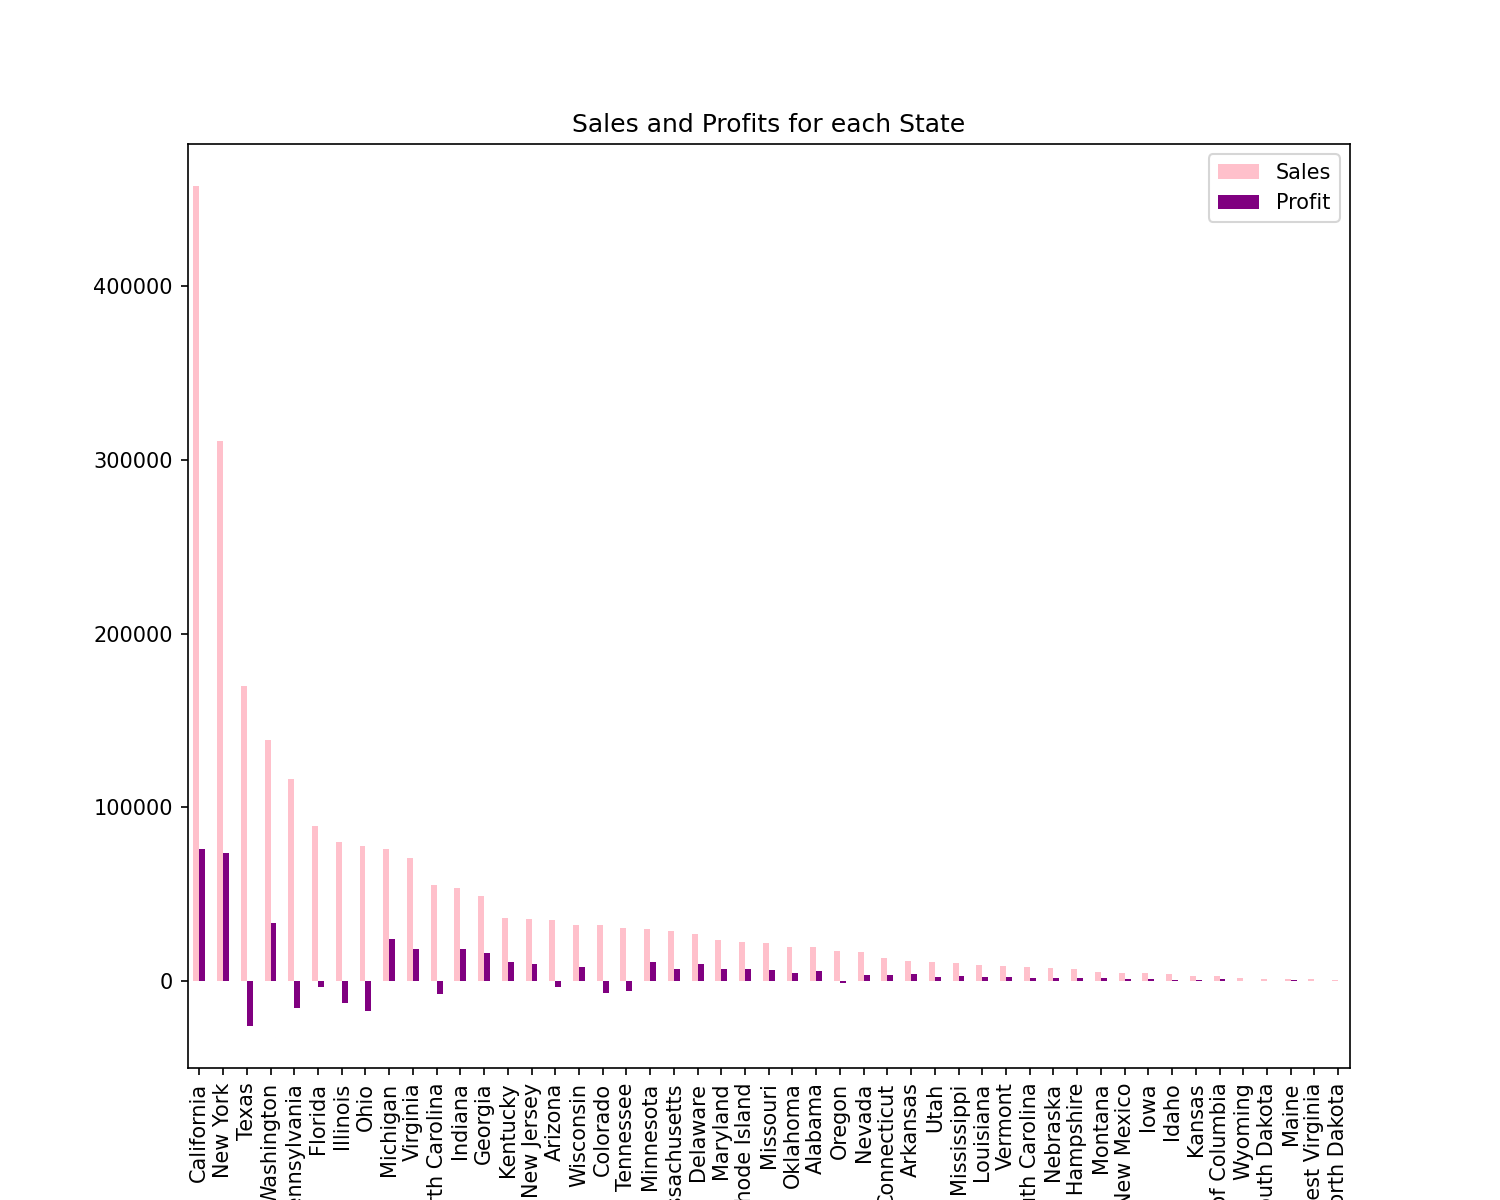

In [109]:
plt.rcParams["figure.figsize"] = [10,8]
df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["pink", "purple"])
plt.title("Sales and Profits for each State")
plt.show()

In [97]:
df.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

## This indicates that cities with moderate sales but high discounts (Texas, Pennsylvania, Illinois, Ohio) are incurring losses

In [98]:
df.groupby("State").sum()['Profit'].sort_values(ascending = False)

State
California              76330.7891
New York                74015.4622
Washington              33368.2375
Michigan                24428.0903
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

## 10 States are operating at net loss (Oregon, Florida, Arizona,Tennessee, Colorado, North Carolina, Illinois, Pennsylvania, Ohio,Texas)                  

## Best performing cities

<IPython.core.display.Javascript object>


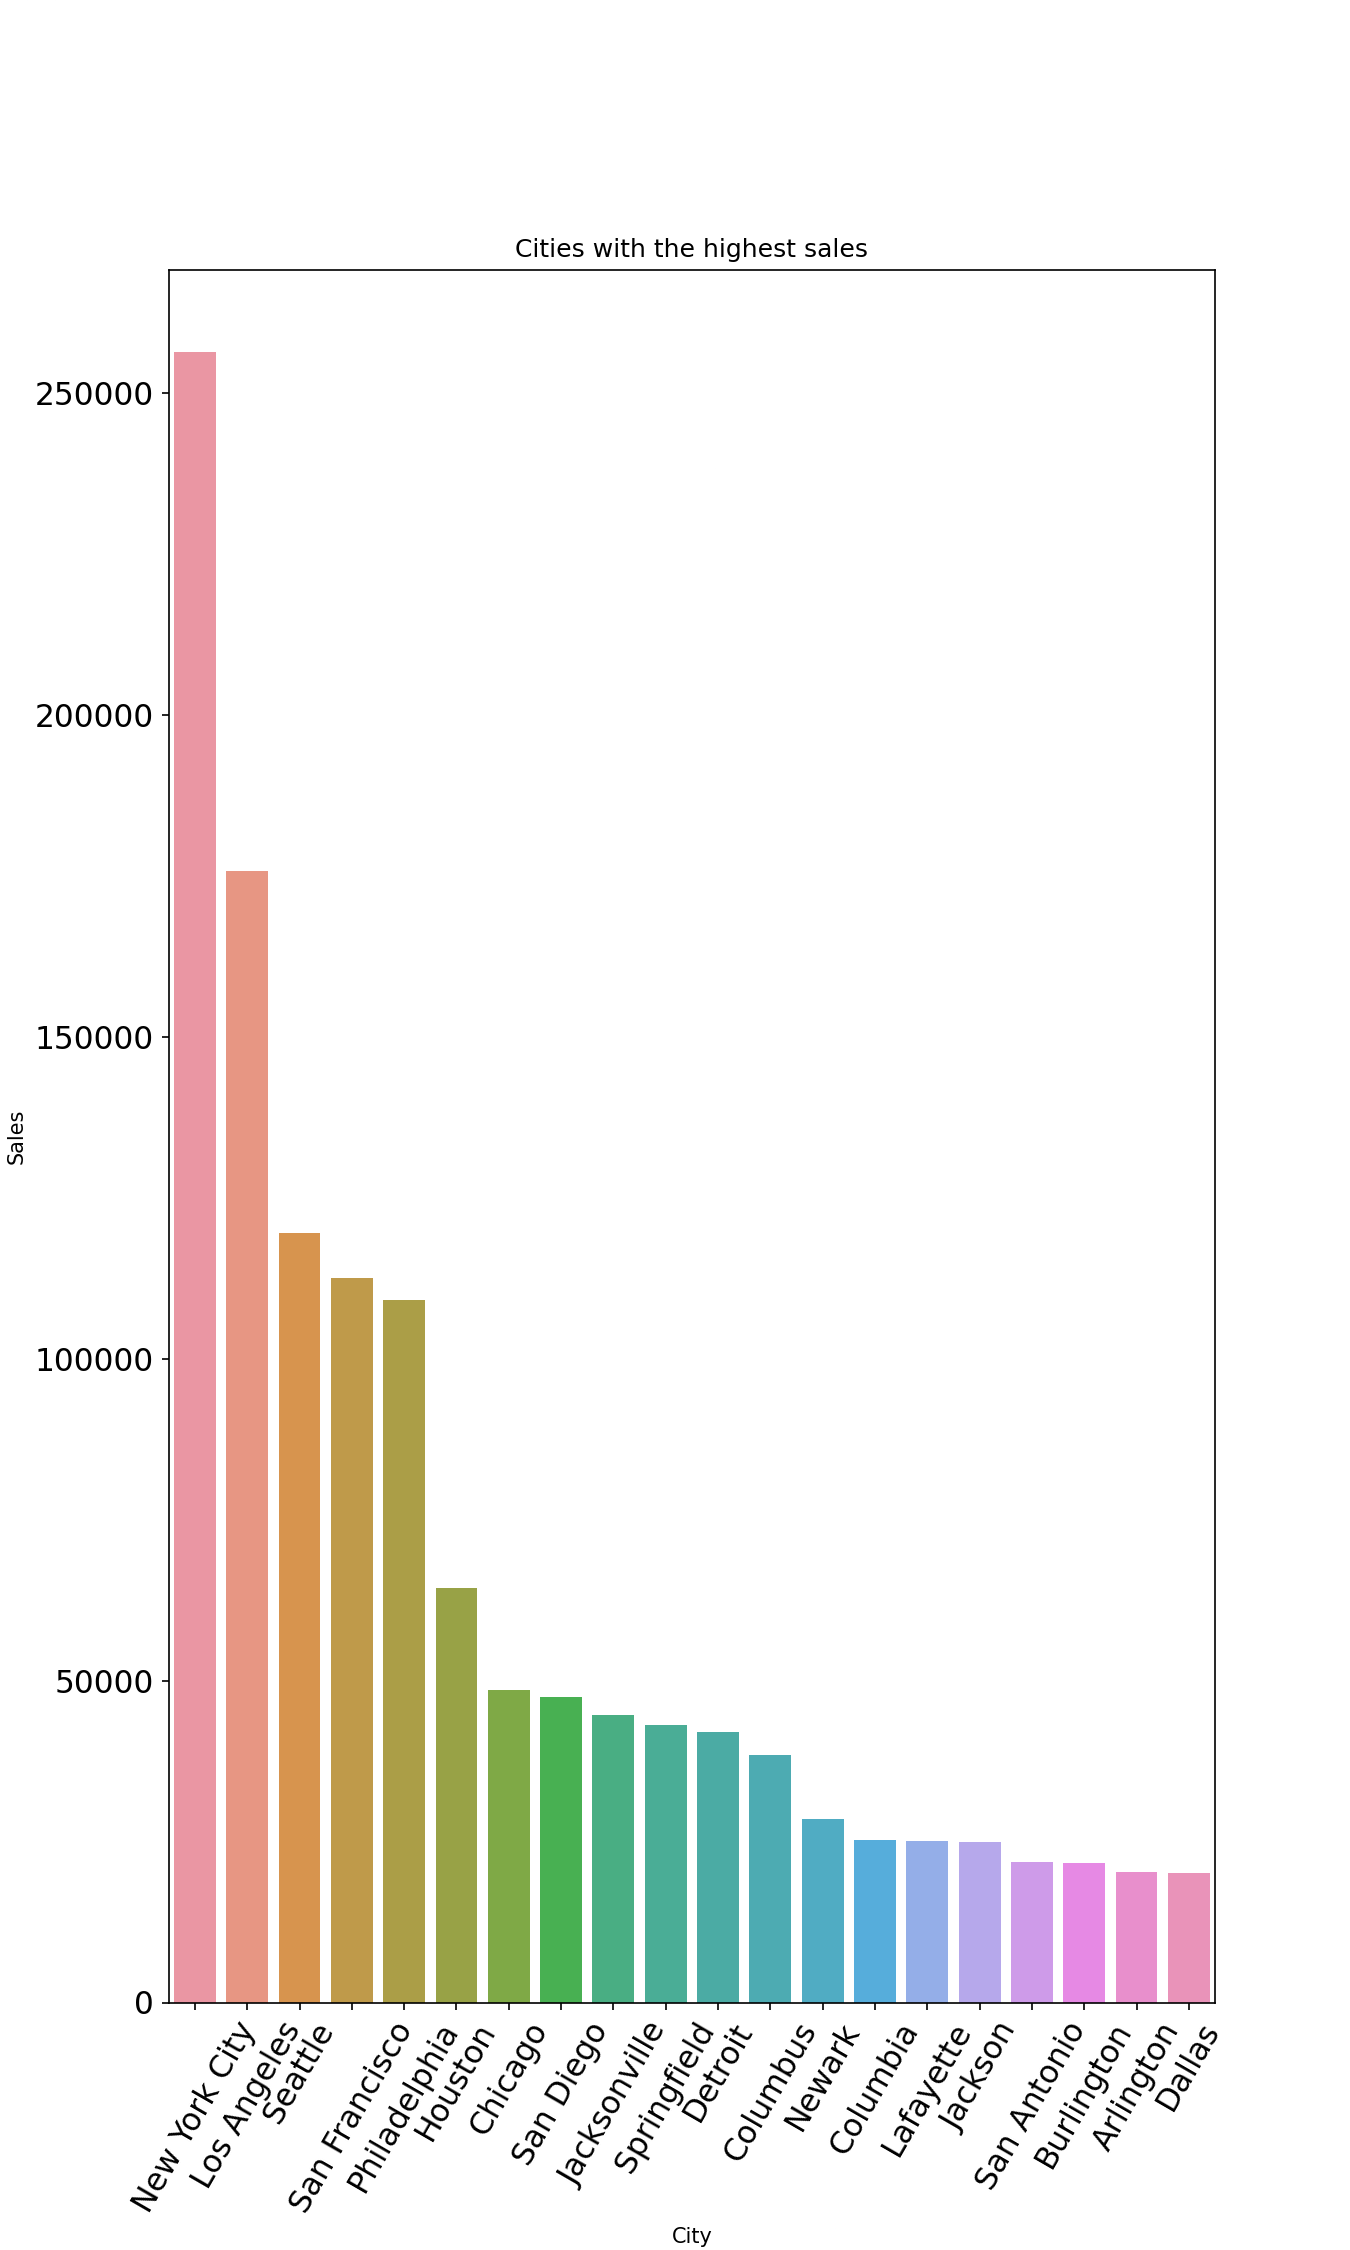

In [118]:
City_df = df.groupby('City').sum()['Sales'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(9,15))
plt.title('Cities with the highest sales')
sns.barplot(x = 'City',y = 'Sales',  data = City_df.head(20)) 
plt.xticks(rotation = 60 , fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.show()

## Worst performing cities

<IPython.core.display.Javascript object>


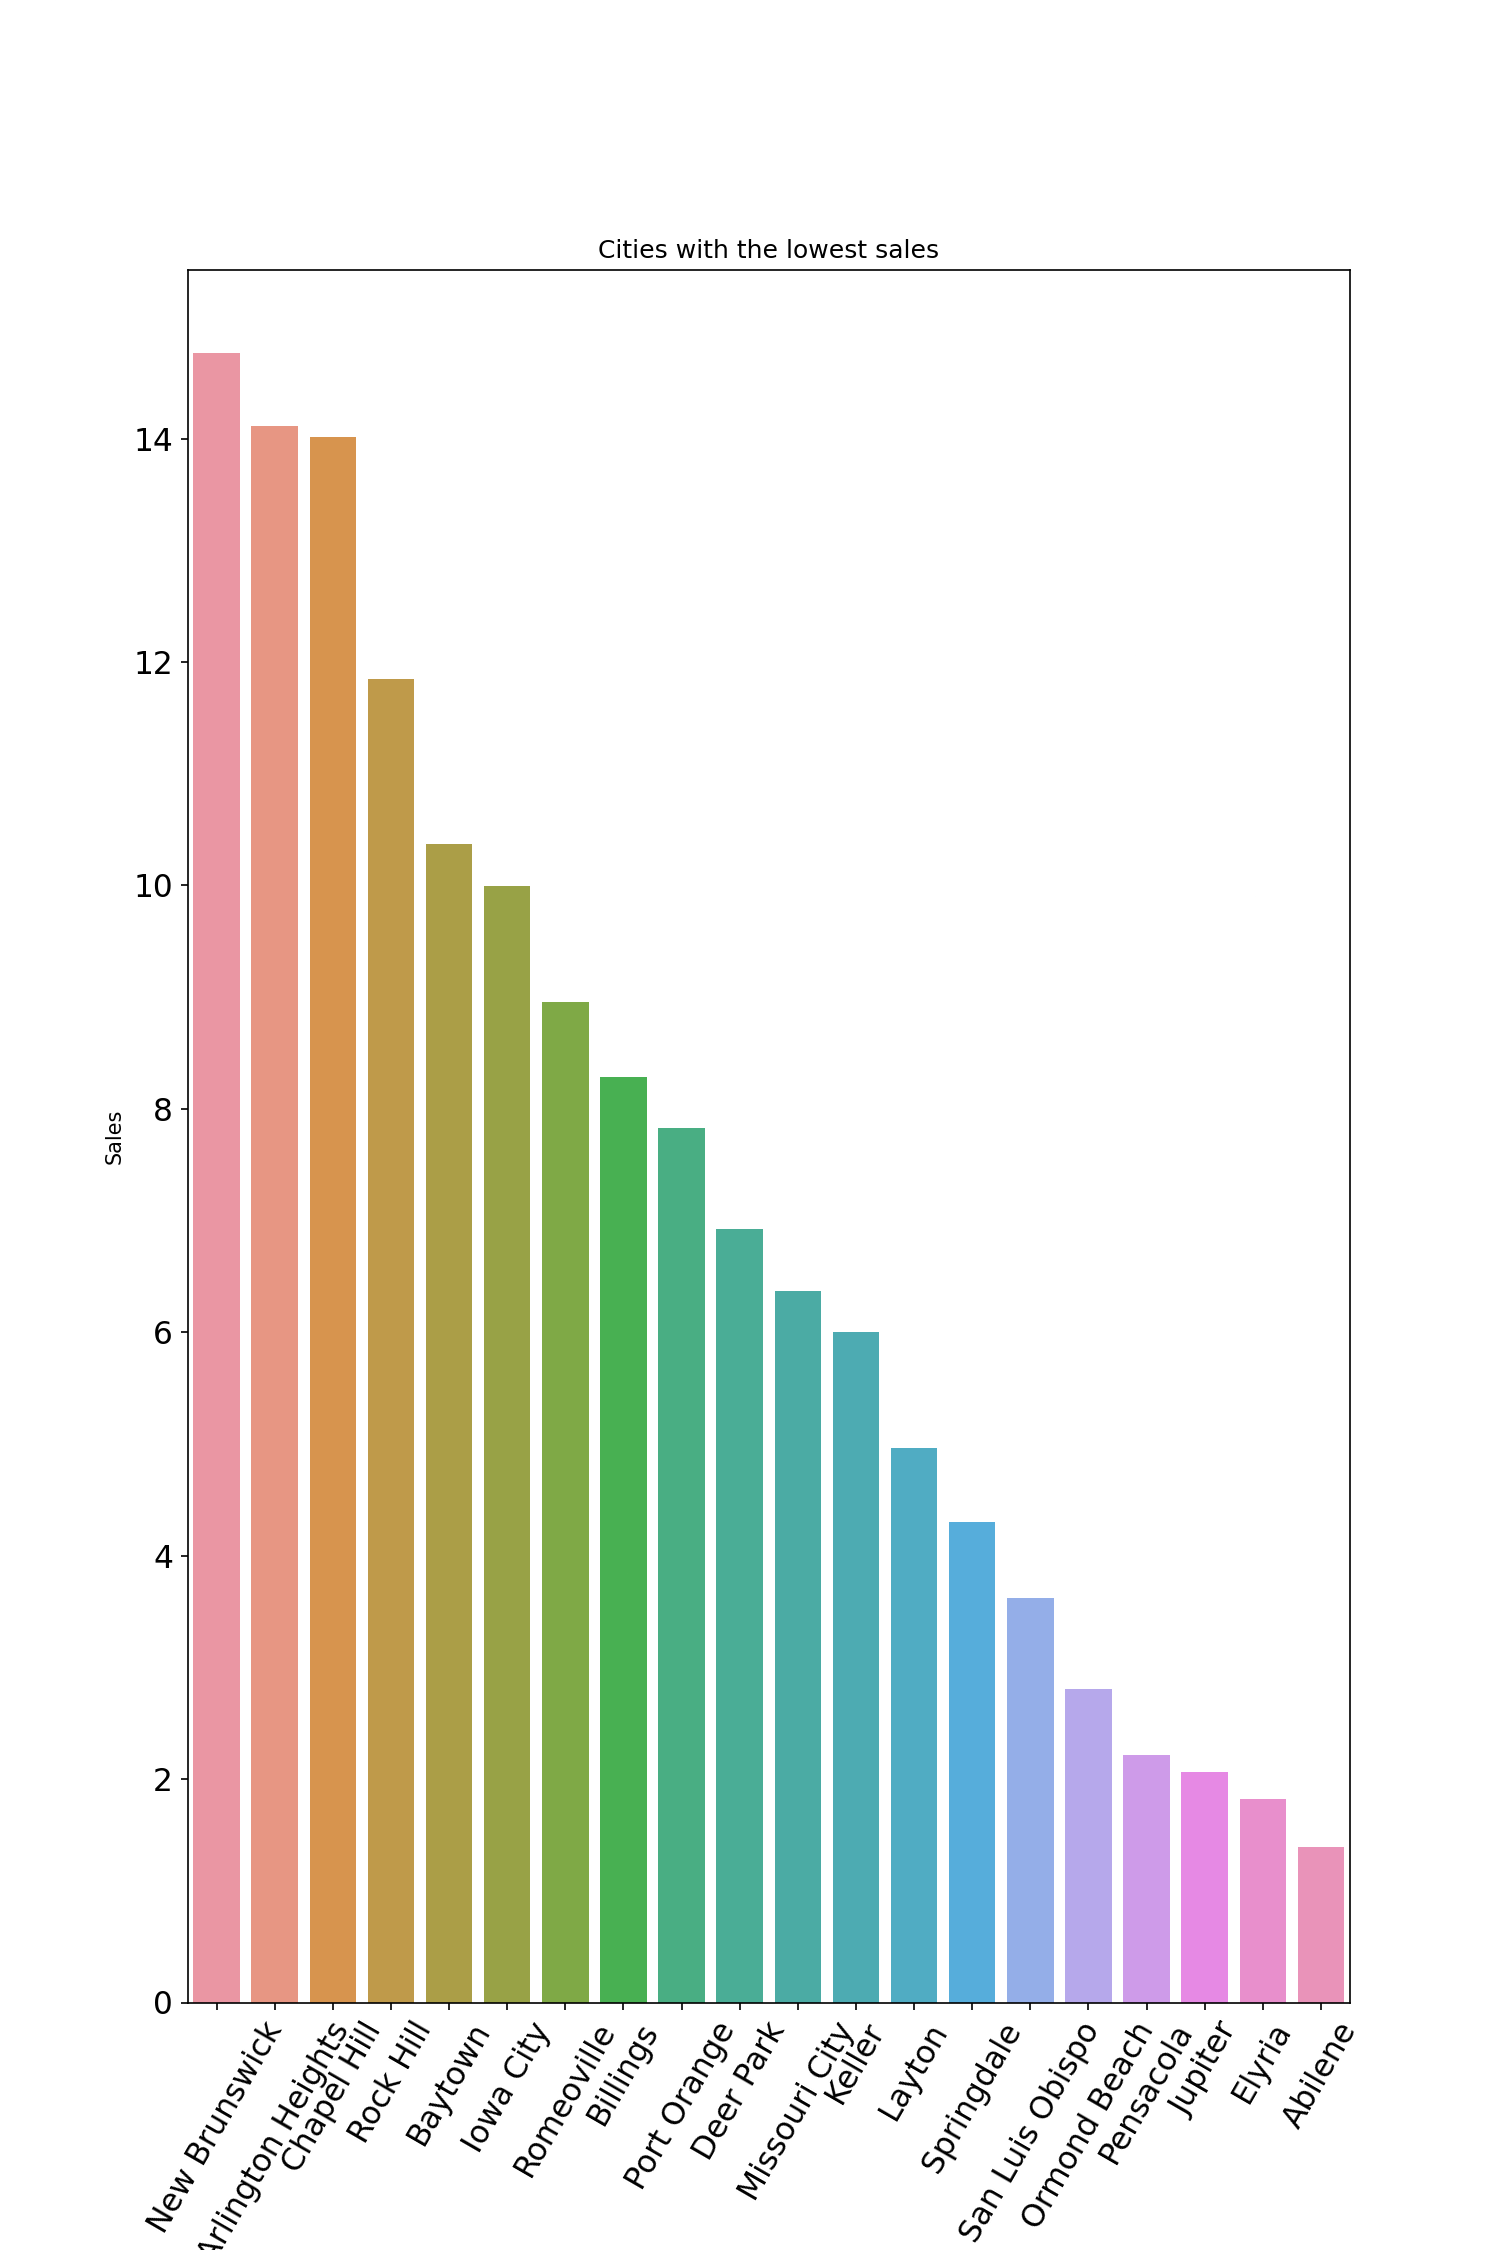

In [119]:
City_df = df.groupby('City').sum()['Sales'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,15))
plt.title('Cities with the lowest sales')
sns.barplot(x = 'City',y = 'Sales',  data = City_df.tail(20)) 
plt.xticks(rotation = 60 , fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.show()

## Region-wise breakdown

<IPython.core.display.Javascript object>


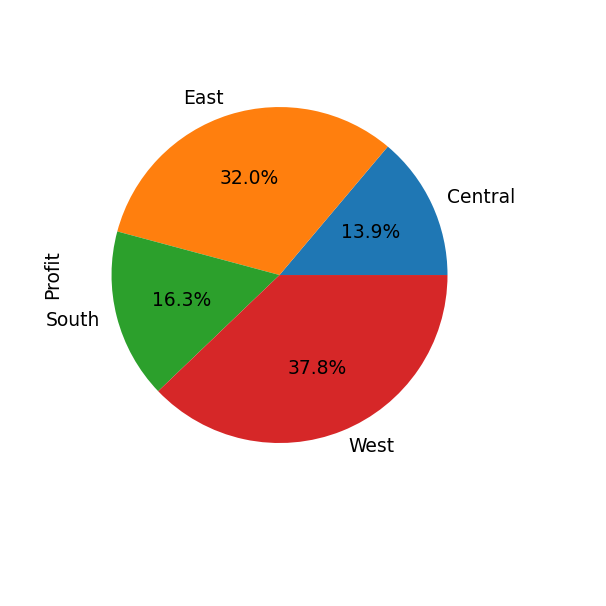

<IPython.core.display.Javascript object>


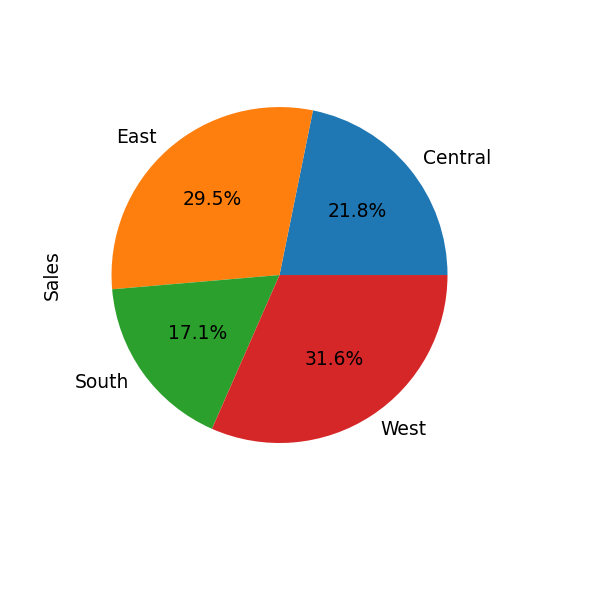

In [101]:
plt.figure(figsize=(3,3))
df.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()
plt.figure(figsize=(3,3))
df.groupby('Region')['Sales'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

<IPython.core.display.Javascript object>


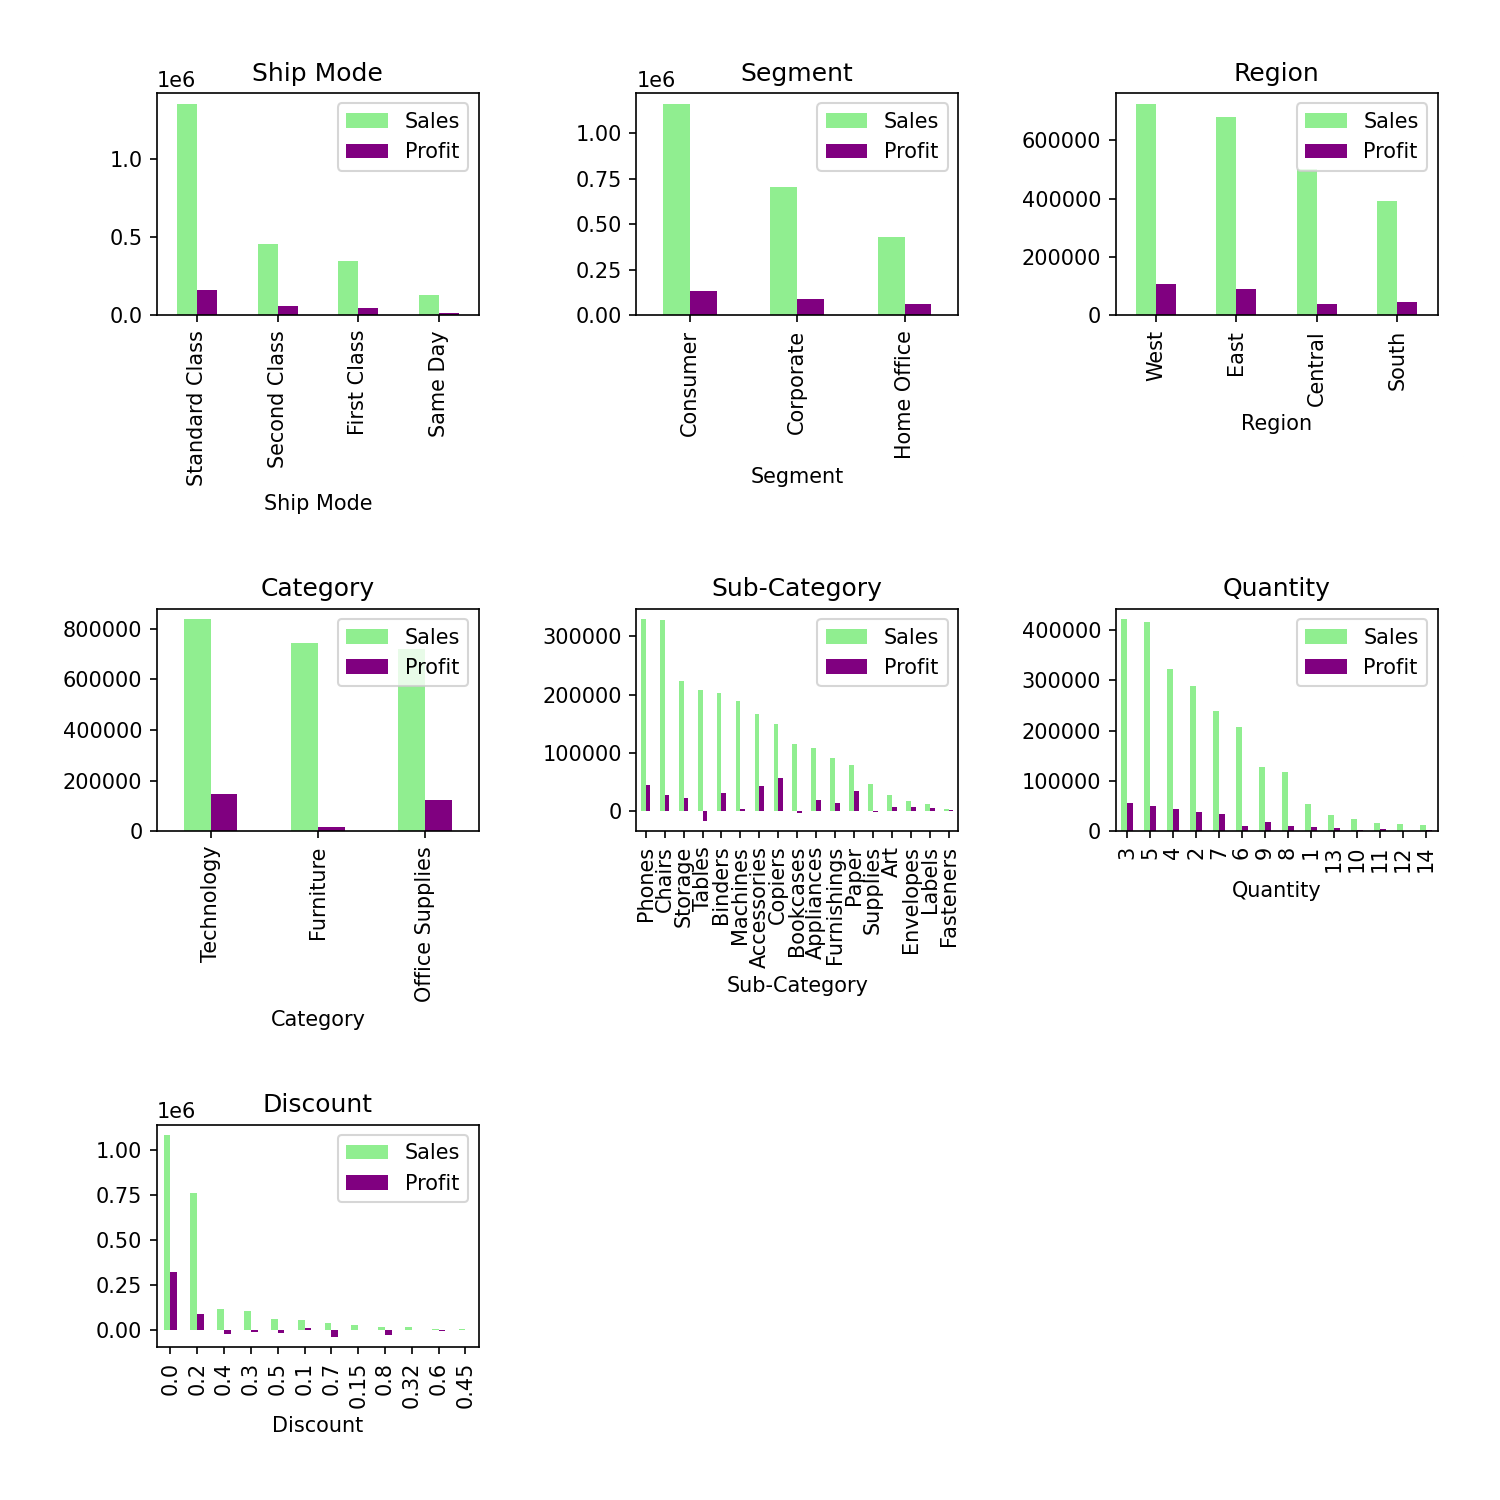

In [104]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(df[i].unique()) < threshold_categories and len(df[i].unique()) > 1]
    
    fig = plt.figure(figsize = (10,10))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()
    
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["lightgreen", "purple"]
getUnique(df, target_variable, sort_by, color, num_categories)    

1. Furniture items are the least profitable
2. Tables, Bookcases, Supplies and Fasteners sell at a loss (descending order)
3. Discount rates of over 0.2 result in operating at very little profits, and sometimes even losses
4. Profits on copiers are high, but their sales are low, so work should be done on increasing their sales 

<IPython.core.display.Javascript object>


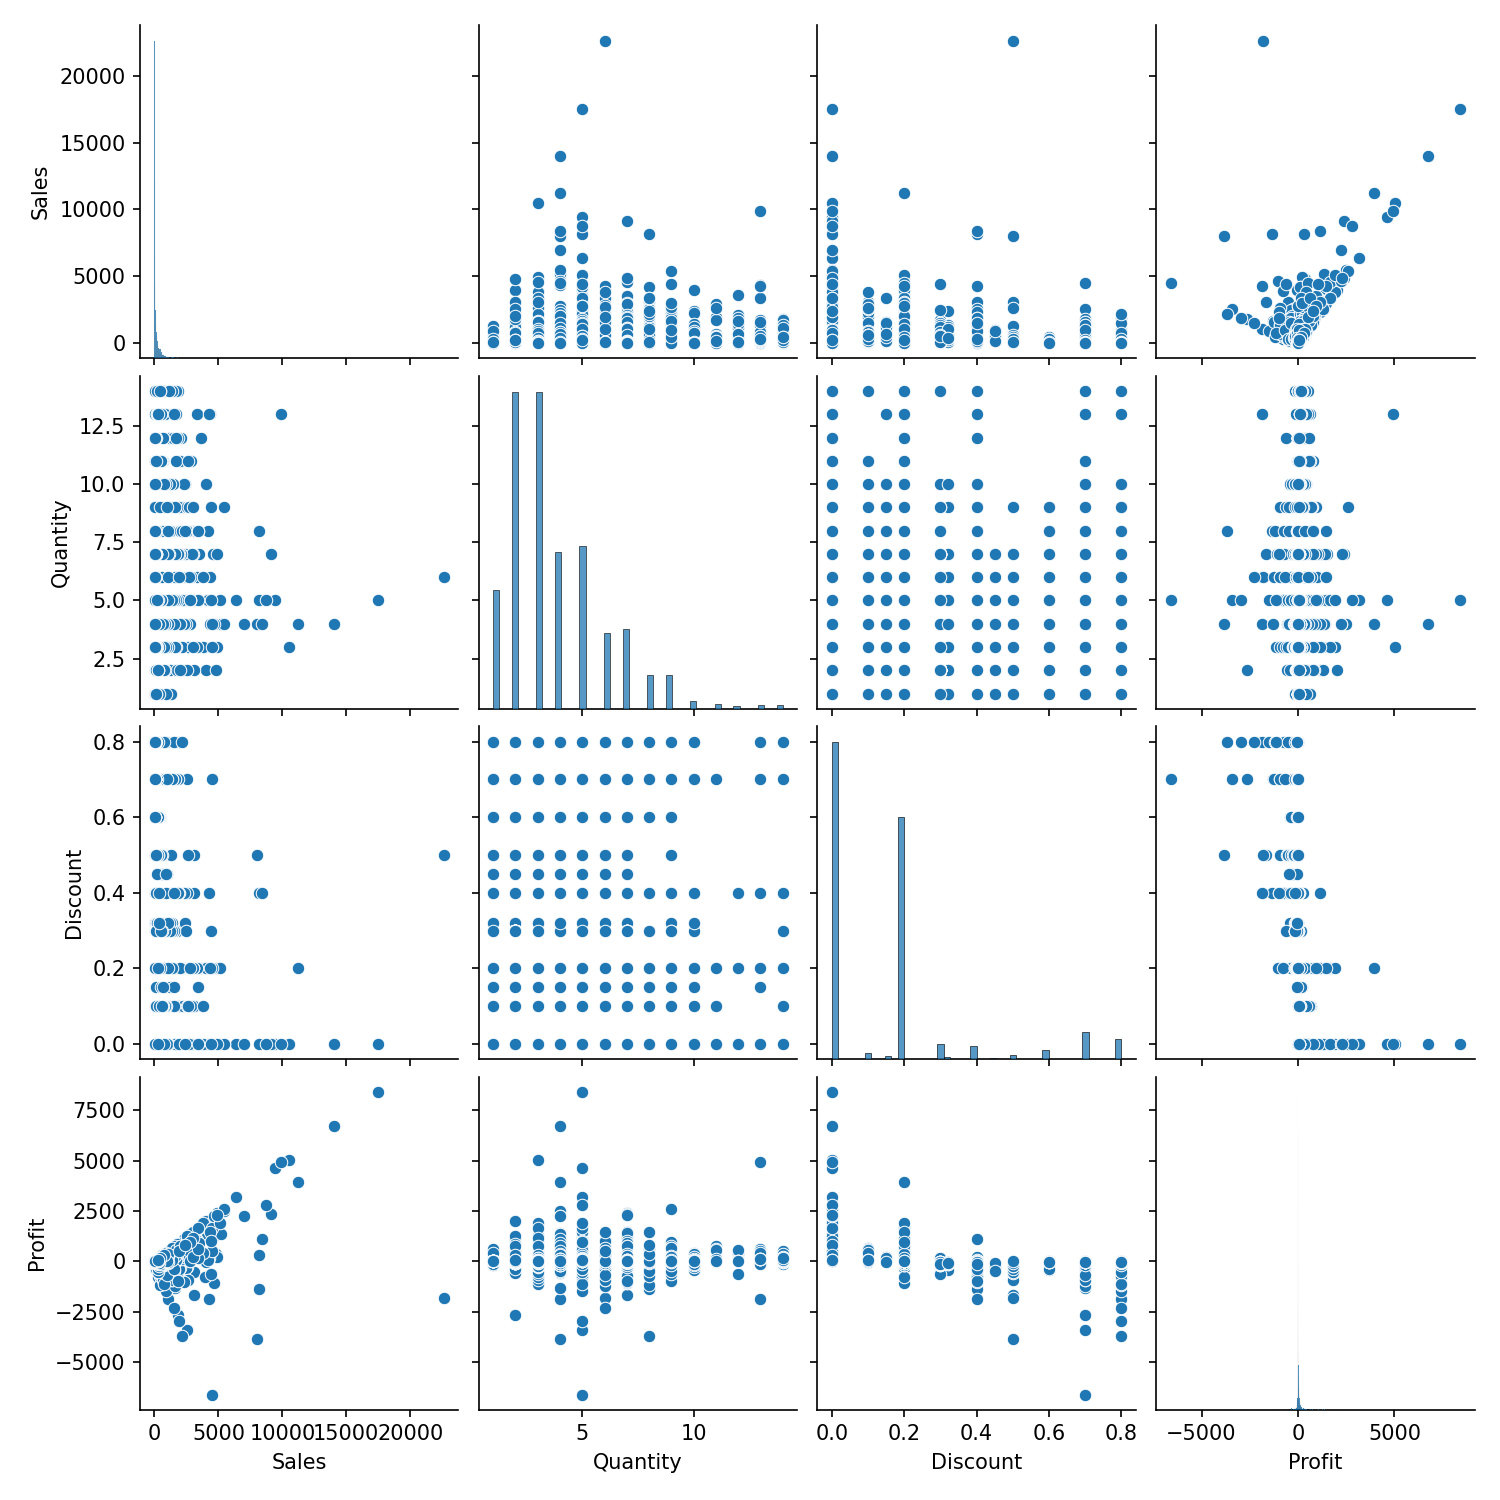

In [122]:
df.drop(columns="Postal Code", axis=1, inplace=True)
sns.pairplot(df)
plt.show()

## This confirms that higher discounts reduce profits

<IPython.core.display.Javascript object>


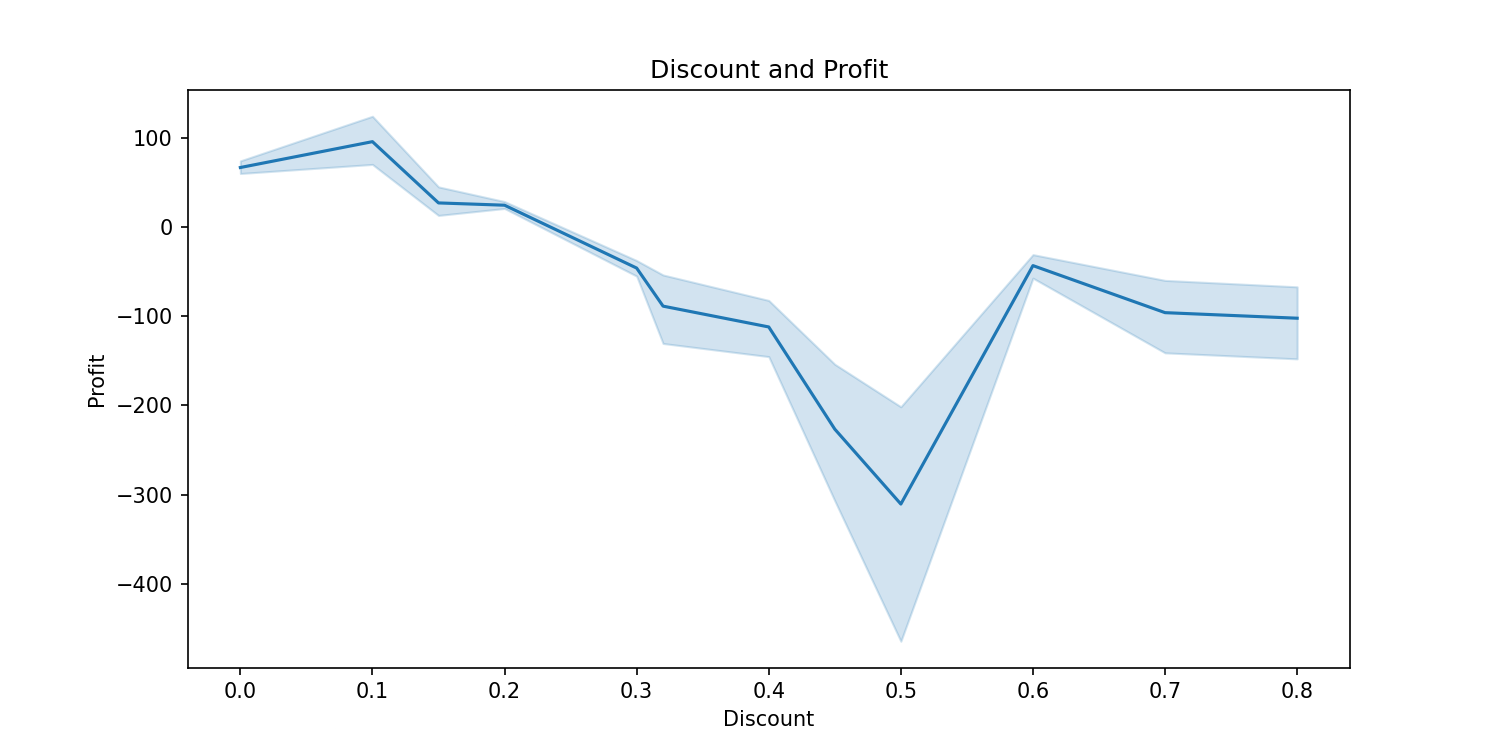

<IPython.core.display.Javascript object>


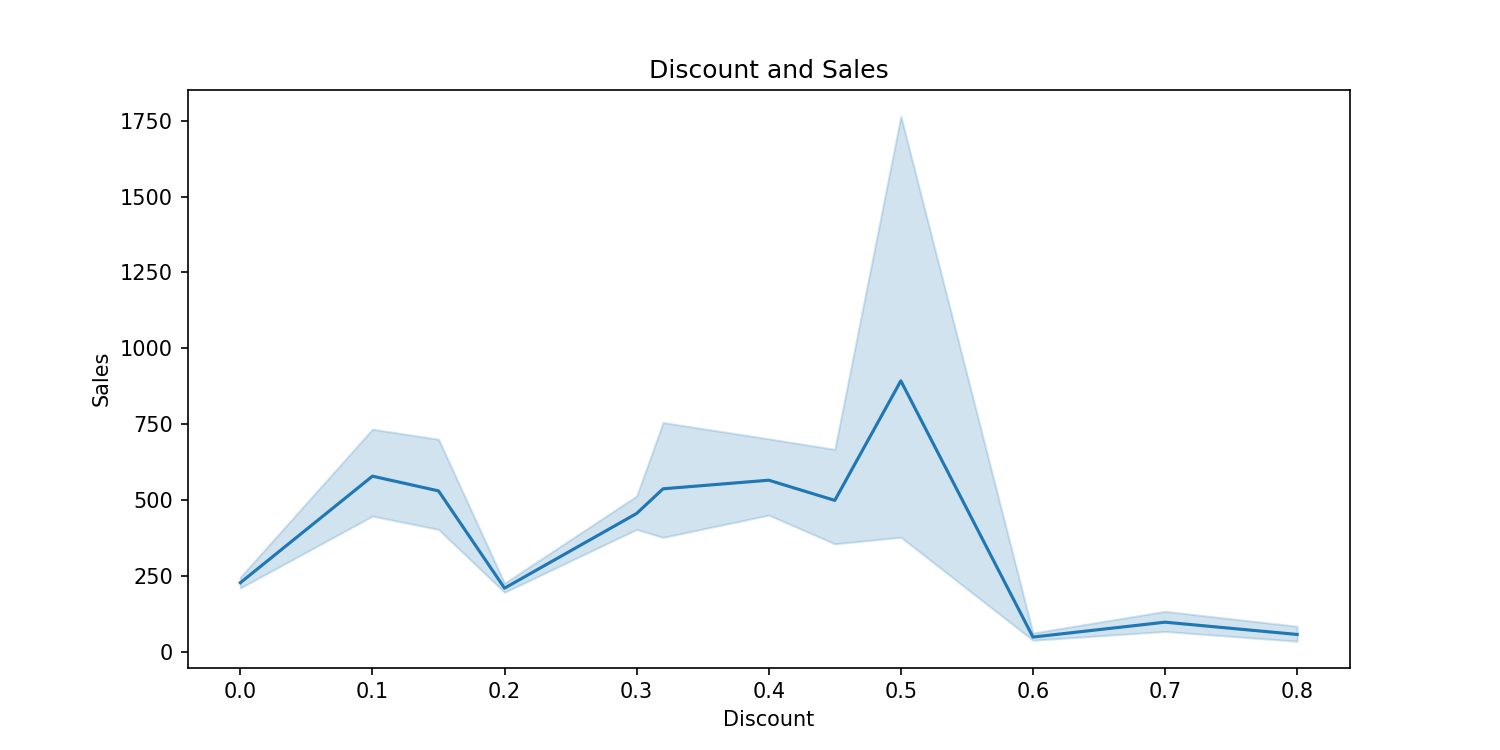

Text(0.5, 1.0, 'Discount and Sales')

In [124]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount and Profit")

plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title("Discount and Sales")